In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
 
 
url = r'C:\Users\joth1\Documents\projeto-amigo-jupyter\influencia_violencia_governo_pandas\dados_acidentes_prf_2021.csv'
url2 = r'C:\Users\joth1\Documents\projeto-amigo-jupyter\influencia_violencia_governo_pandas\dados_acidentes_prf_2022.csv'
url3 = r'C:\Users\joth1\Documents\projeto-amigo-jupyter\influencia_violencia_governo_pandas\dados_acidentes_prf_2023.csv'

url = url.replace('\\', '/')
url2 = url2.replace('\\', '/')
url3 = url3.replace('\\', '/')


# Tente ler o arquivo usando utf-8 e, se falhar, tente latin-1
try:
    df = pd.read_csv(url, encoding='utf-8', sep=';')
except UnicodeDecodeError:
    df = pd.read_csv(url, encoding='latin-1', sep=';')

df['SAFRA'] = 2021

try:
    df2 = pd.read_csv(url2, encoding='utf-8', sep=';')
except UnicodeDecodeError:
    df2 = pd.read_csv(url2, encoding='latin-1', sep=';')

df2['SAFRA'] = 2022


try:
    df3 = pd.read_csv(url3, encoding='utf-8', sep=';')
except UnicodeDecodeError:
    df3 = pd.read_csv(url3, encoding='latin-1', sep=';')

df3['SAFRA'] = 2023


# empilha todas as bases da policia 
df_final = pd.concat([df, df2, df3], ignore_index=True)

display(df_final)

C:\Users\joth1\AppData\Local\Temp\ipykernel_7064\697129273.py:19: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(url, encoding='latin-1', sep=';')


,id,data_inversa,dia_semana,horario,uf,br,km,municipio,causa_acidente,tipo_acidente,...,ilesos,ignorados,feridos,veiculos,latitude,longitude,regional,delegacia,uop,SAFRA
0,331730,01/01/2021,sexta-feira,05:30:00,SP,116.0,453,REGISTRO,Reação tardia ou ineficiente do condutor,Tombamento,...,0,0,1,1,"-24,56168114","-47,86752174",SPRF-SP,DEL05-SP,UOP01-DEL05-SP,2021
1,331804,01/01/2021,sexta-feira,08:05:00,AM,174.0,937,MANAUS,Reação tardia ou ineficiente do condutor,Colisão traseira,...,5,0,1,4,"-2,508068","-60,036434",SPRF-AM,DEL01-AM,UOP01-DEL01-AM,2021
2,331815,01/01/2021,sexta-feira,10:10:00,CE,222.0,"128,5",ITAPAJE,Velocidade Incompatível,Tombamento,...,0,1,2,2,"-3,707626","-39,623509",SPRF-CE,DEL04-CE,UOP03-DEL04-CE,2021
3,331823,01/01/2021,sexta-feira,12:30:00,RJ,493.0,18,MAGE,Ingestão de álcool e/ou substâncias psicoativa...,Colisão lateral,...,1,0,1,2,"-22,6687122","-43,01862696",SPRF-RJ,DEL02-RJ,UOP04-DEL02-RJ,2021
4,331843,01/01/2021,sexta-feira,14:40:00,RJ,393.0,252,BARRA DO PIRAI,Condutor Dormindo,Colisão frontal,...,1,0,2,2,"-22,43422023","-43,77561487",SPRF-RJ,DEL05-RJ,UOP02-DEL05-RJ,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190097,567883,14/07/2023,sexta-feira,07:18:00,PR,369.0,203,APUCARANA,Pedestre andava na pista,Atropelamento de Pedestre,...,0,1,1,2,"-23,54777352","-51,45125985",SPRF-PR,DEL07-PR,UOP03-DEL07-PR,2023
190098,567892,20/11/2023,segunda-feira,11:55:00,RO,319.0,18,PORTO VELHO,Demais falhas mecânicas ou elétricas,Eventos atípicos,...,2,0,0,1,"-8,04389791","-63,49189202",SPRF-RO,DEL01-RO,UOP01-DEL01-RO,2023
190099,567951,27/09/2023,quarta-feira,18:35:00,GO,153.0,493,GOIANIA,Entrada inopinada do pedestre,Queda de ocupante de veículo,...,0,0,2,2,"-16,64443606","-49,21018839",SPRF-GO,DEL01-GO,UOP01-DEL01-GO,2023
190100,567975,18/11/2023,sábado,18:46:00,PE,232.0,120,CARUARU,Transtornos Mentais (exceto suicidio),Atropelamento de Pedestre,...,2,0,0,2,"-8,29826697","-35,90192301",SPRF-PE,DEL02-PE,UOP01-DEL02-PE,2023


### Estados com mais concentração de acidentes

In [51]:
# Suponhamos que df_final seja o seu DataFrame

cubo = df_final.groupby('uf').agg(qtd_acidentes=('uf', 'size'),
                                   qtd_ileso=('ilesos', 'sum'),
                                   qtd_feridos=('feridos', 'sum')).reset_index()

total = cubo['qtd_acidentes'].sum() 
cubo = cubo.sort_values('qtd_acidentes', ascending=False)
cubo['porcentagem'] = (cubo['qtd_acidentes'] / total) * 100
cubo = cubo.head(6)


### Criação do Gráfico

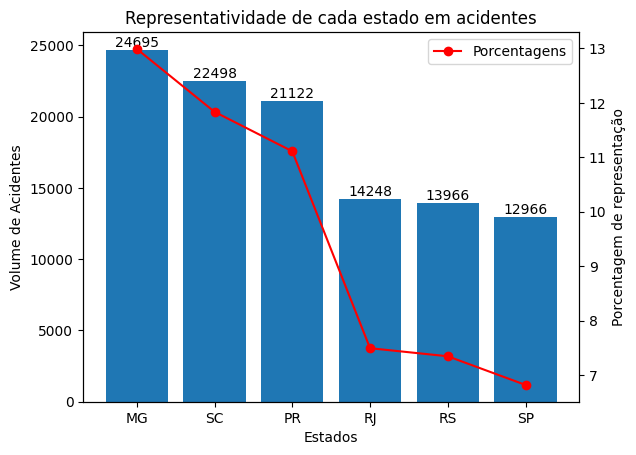

In [52]:

fig, ax = plt.subplots()

# Plotar o gráfico de barras com rótulos de dados
bars = ax.bar(cubo['uf'], cubo['qtd_acidentes'])

# Adicionar rótulos de dados acima das barras
for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

# Criar um segundo eixo y para a linha de porcentagem
ax2 = ax.twinx()
ax2.plot(cubo['uf'], cubo['porcentagem'], color='red', marker='o', label='Porcentagens')

# Adicionar legendas e rótulos

ax.set_xlabel('Estados')
ax.set_ylabel('Volume de Acidentes')
ax2.set_ylabel('Porcentagem de representação')
plt.legend()
plt.title('Representatividade de cada estado em acidentes')
plt.show()

### Os dez primeiros tipos de acidentes descritos abaixo, concentram cerca de 70,6% de todos acidentes de transito do brasil 

In [53]:

acidentes2 = df_final.groupby('causa_acidente').agg(qtd=('causa_acidente','size')).reset_index()
acidentes2 = acidentes2.sort_values('qtd', ascending=False)
acidentes2 = acidentes2.head(10)
display(acidentes2)

total = df_final.value_counts('causa_acidente').sum()

dez_primeiros = acidentes2['qtd'].sum()/total * 100
dez_primeiros = round(dez_primeiros, 1)
display(f"os primeiros dez acidentes, ocupam: {dez_primeiros}% dos acidentes totais")

,causa_acidente,qtd
56,Reação tardia ou ineficiente do condutor,24174
8,Ausência de reação do condutor,21490
0,Acessar a via sem observar a presença dos outr...,16493
73,Velocidade Incompatível,15575
14,Condutor deixou de manter distância do veículo...,13297
39,Ingestão de álcool pelo condutor,12088
41,Manobra de mudança de faixa,10833
23,Demais falhas mecânicas ou elétricas,8017
13,Condutor Dormindo,6335
68,Transitar na contramão,5967


'os primeiros dez acidentes, ocupam: 70.6% dos acidentes totais'

### Não existe concentração de acidentes nos dias da semana

In [54]:
total = df_final['dia_semana'].value_counts().sum()
display(total)
dia = (df_final['dia_semana'].value_counts()/total) * 100
display(dia)

t = dia.sum()
display(t)


190102

dia_semana
domingo          16.836225
sábado           16.644223
sexta-feira      15.405414
segunda-feira    13.598489
quinta-feira     12.883084
quarta-feira     12.464361
terça-feira      12.168204
Name: count, dtype: float64

100.0

,SAFRA,qtd
0,2021,64539
1,2022,64547
2,2023,61016


([<matplotlib.patches.Wedge at 0x1b9aa5294f0>,
 [Text(0.5314525151579229, 0.9630982422018627, '2021'),
  Text(-1.098136226672834, -0.06400646583549392, '2022'),
  Text(0.5865926092936914, -0.9305423744902855, '2023')],
 [Text(0.2898831900861398, 0.5253263139282887, '33.9%'),
  Text(-0.5989833963670004, -0.03491261772845123, '34.0%'),
  Text(0.31995960506928617, -0.5075685679037921, '32.1%')])

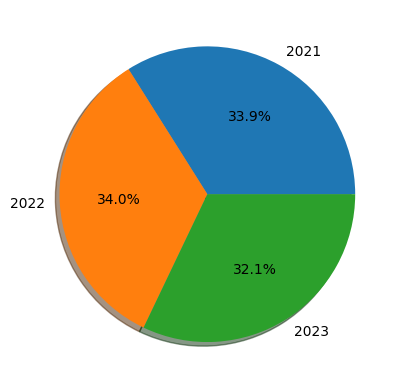